In [1]:
'''Exploration of accuracy importance'''

'Exploration of accuracy importance'

In [67]:
import csv
import collections
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold, cross_val_predict
%matplotlib inline

In [3]:
#files
folder='D:/IA/Kaggle/Facebook/'
training=folder+'train.csv'
small=folder+'subcell.csv'

In [4]:
#load data
with open(training, 'r',newline='') as csvfile:
    reader=csv.reader(csvfile)
    print(reader.__next__())
datab=np.loadtxt(small, delimiter=",",skiprows=1)
print(datab.shape)
print(datab[0])

['row_id', 'x', 'y', 'accuracy', 'time', 'place_id']
(15186, 6)
[  9.14000000e+02   5.00700000e+00   7.57360000e+00   1.94000000e+02
   5.45337000e+05   7.74158936e+09]


In [5]:
#prepare X and y
pos_time=4
X=np.concatenate((datab[:,[1,2,3]],datab[:,[pos_time]]%1440,(datab[:,[pos_time]]//1440)%7),axis=1)
y=np.ravel(datab[:,[5]]).astype('int64')
print(X.shape)
print(X[0])

(15186, 5)
[    5.007      7.5736   194.      1017.         0.    ]


In [6]:
accuracies=X[:,[2]]

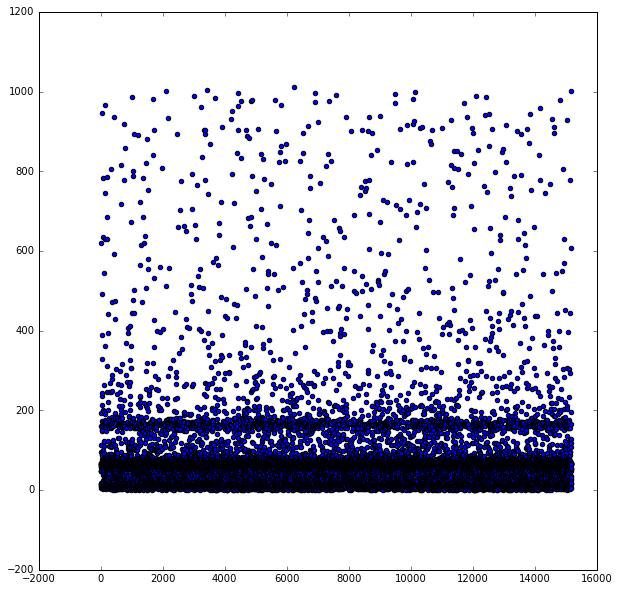

In [20]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.scatter(range(len(accuracies)),accuracies)

'histogram'

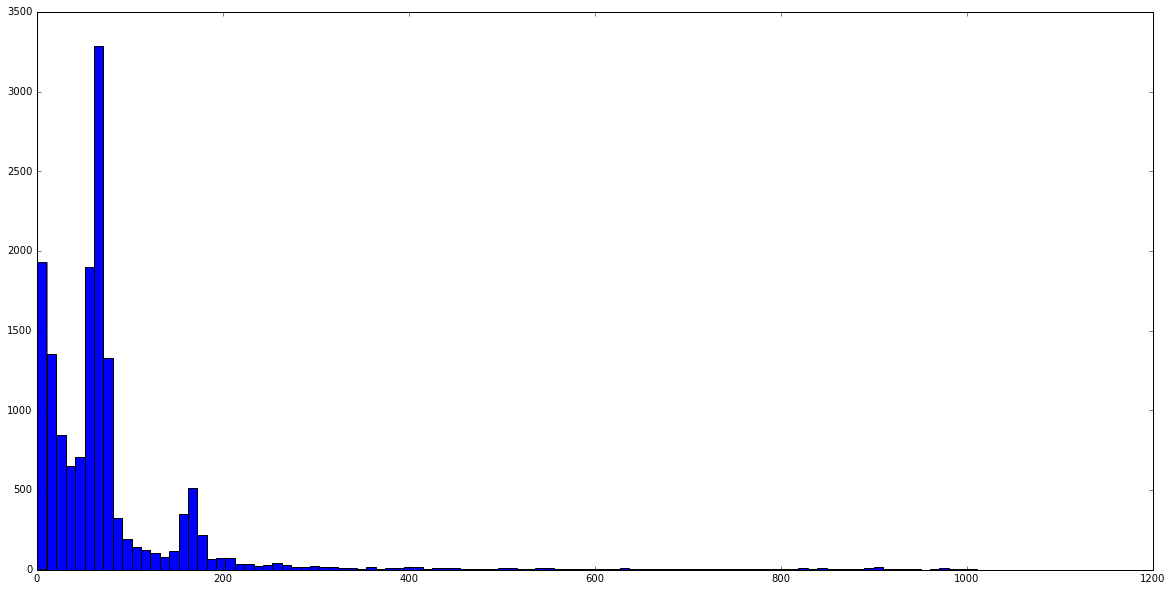

In [32]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.hist(accuracies,100)
'histogram'

'Density function : only < 200'

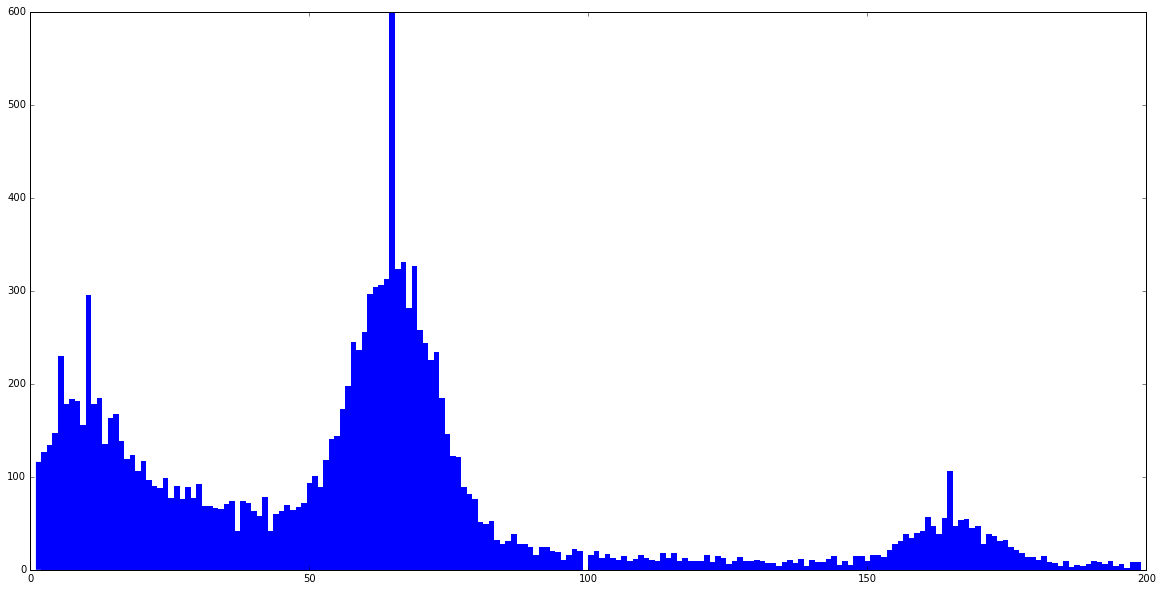

In [34]:
Baccuracies=[]
for a in accuracies :
    if a<200:
        Baccuracies.append(int(a))
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.hist(Baccuracies,200,linewidth=0)
'Density function : only < 200'

In [56]:
# LONELY GUYS ---------------------------
N=2

In [57]:
count=collections.defaultdict(int)
for v in y:
    count[v]+=1

In [58]:
accuraciesL=[]
for x,u in zip(X,y) :
    if count[u]==N:
        accuraciesL.append(x[2])

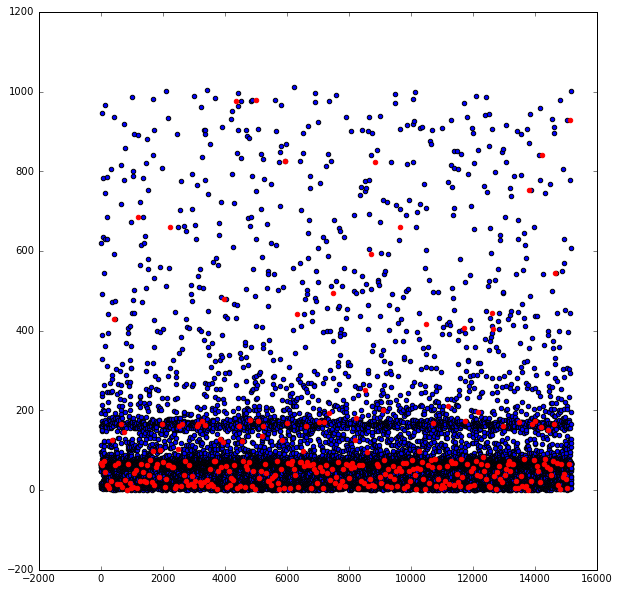

In [59]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.scatter(range(len(accuracies)),accuracies)
ax.scatter([i*len(accuracies)/len(accuraciesL) for i in range(len(accuraciesL))],accuraciesL,color='r')

'histogram'

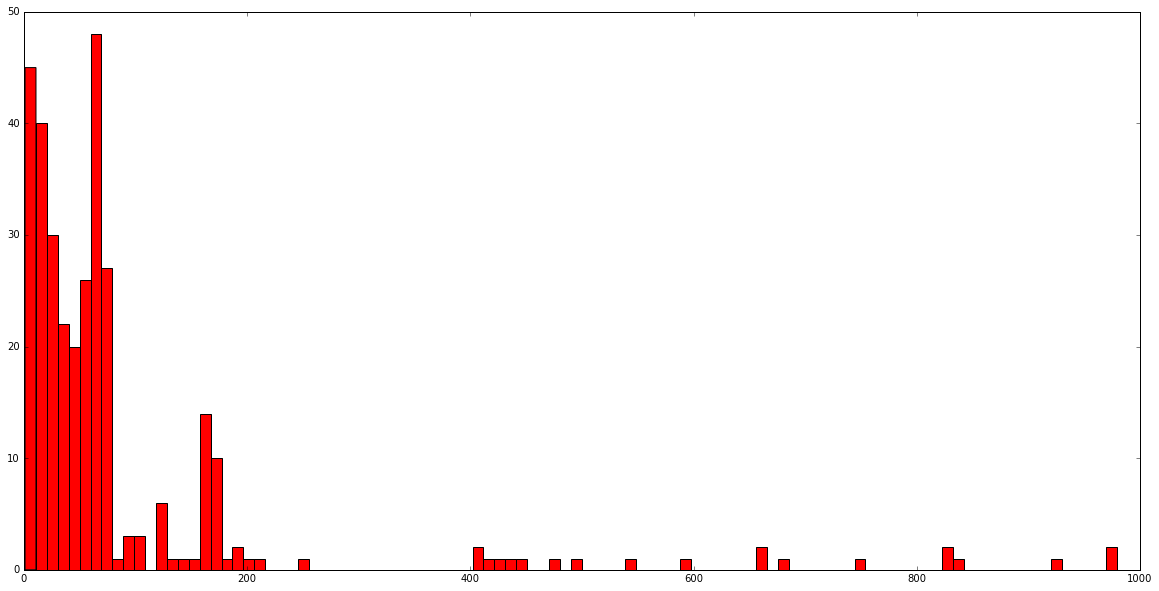

In [60]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.hist(accuraciesL,100,color='r')
'histogram'

'Density function : only < 200'

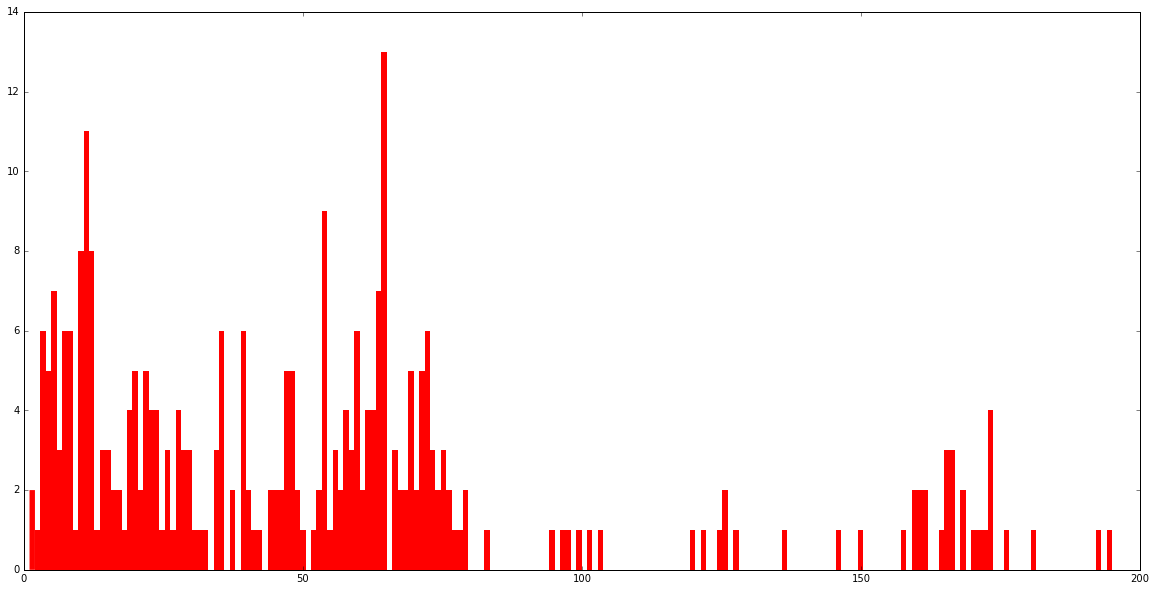

In [61]:
BaccuraciesL=[]
for a in accuraciesL :
    if a<200:
        BaccuraciesL.append(int(a))
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(111)
ax.hist(BaccuraciesL,200,linewidth=0,color='r')
'Density function : only < 200'

In [62]:
# HOW IS THE PREDICTION?

In [65]:
#KNN

#[x,y,acc,minute(1day), day]
weights=[1/2,1,0.0005,1/18000,0.0001]
knn = KNeighborsClassifier(n_neighbors=15, 
                           algorithm='auto',
                           weights='distance',#'uniform' or 'distance'
                           metric='minkowski',
                           p=2,
                           metric_params=None, 
                           leaf_size=30, 
                           n_jobs=1)

In [69]:
#get the predictions on cross validations
cvi=KFold(len(X), n_folds=10, shuffle=True, random_state=None)
predicted = cross_val_predict(knn, X*weights, y, cv=cvi, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
right=y==predicted
print(sum(right)/len(right))

0.489727380482


In [71]:
accuraciesG,accuraciesW=[],[]#good and wrong
for x,u in zip(X,right) :
    if u:
        accuraciesG.append(x[2])
    else :
        accuraciesW.append(x[2])

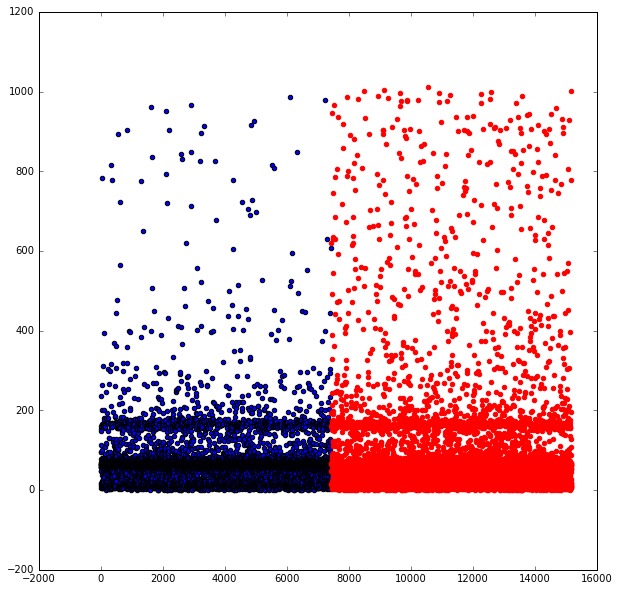

In [72]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.scatter(range(len(accuraciesG)),accuraciesG)
ax.scatter(range(len(accuraciesG),len(accuraciesG)+len(accuraciesW)),accuraciesW,color='r')

'histogram'

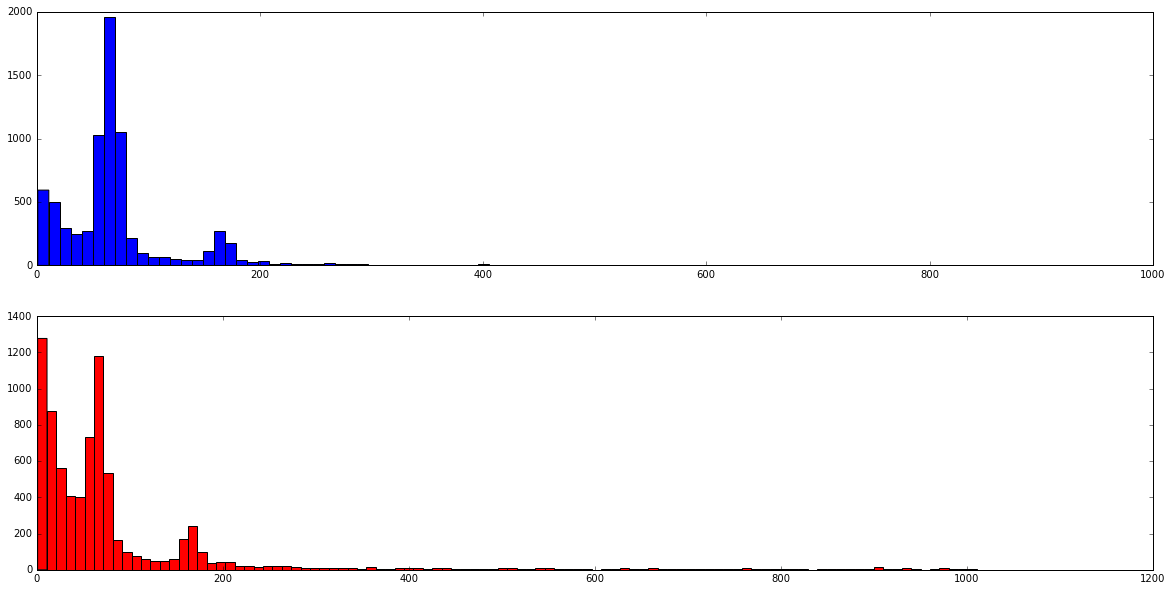

In [77]:
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(211)
ax.hist(accuraciesG,100)
ax2=fig.add_subplot(212)
ax2.hist(accuraciesW,100,color='r')
'histogram'

'Density function : only < 200'

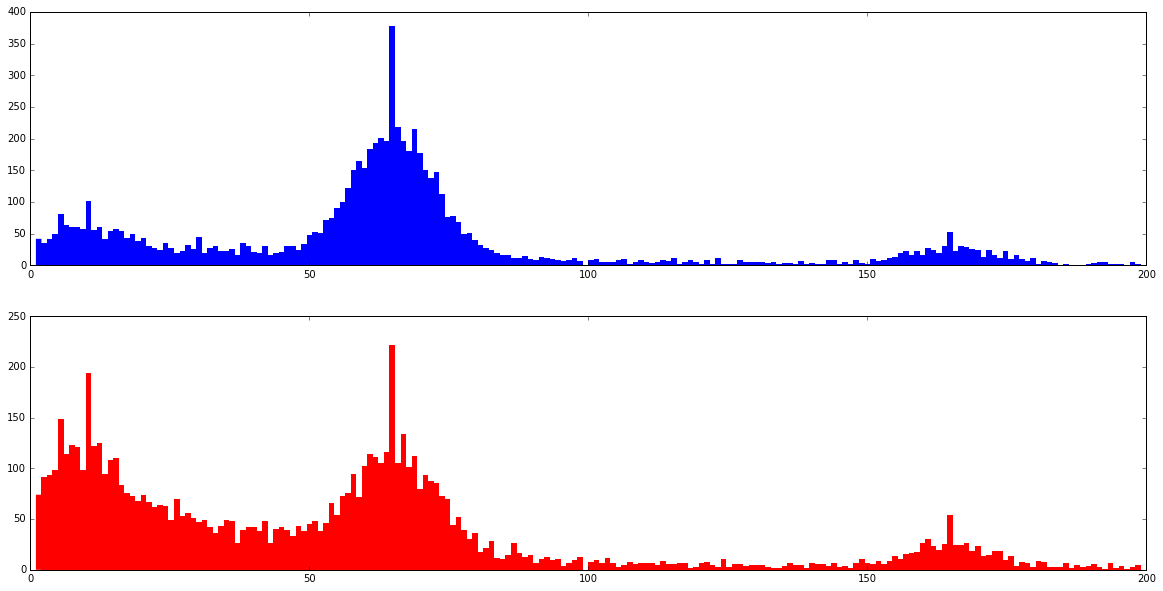

In [78]:
BaccuraciesG=[]
BaccuraciesW=[]
for a in accuraciesG :
    if a<200:
        BaccuraciesG.append(int(a))
for a in accuraciesW :
    if a<200:
        BaccuraciesW.append(int(a))
fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(211)
ax.hist(BaccuraciesG,200,linewidth=0)
ax=fig.add_subplot(212)
ax.hist(BaccuraciesW,200,linewidth=0,color='r')
'Density function : only < 200'